In [ ]:
# Importing dependancies for data munge
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
df = pd.read_csv("Resources/VSRR_Provisional_Drug_Overdose_Death_Counts.csv")
# Isolating 2017 as year used, keeping only relevant data
df_year = df.set_index("Year")
year_loc = df_year.loc[2017, ["State Name", "Indicator", "Data Value"]]
year_df = pd.DataFrame(year_loc).reset_index()

year_df

,Year,State Name,Indicator,Data Value
0,2017,Alaska,Psychostimulants with abuse potential (T43.6),52
1,2017,Alaska,Natural & semi-synthetic opioids (T40.2),30
2,2017,Alaska,Number of Drug Overdose Deaths,117
3,2017,Alaska,Cocaine (T40.5),16
4,2017,Alaska,Heroin (T40.1),43
...,...,...,...,...
5683,2017,New York City,Percent with drugs specified,99.66974901
5684,2017,New York City,"Natural, semi-synthetic, & synthetic opioids, ...","1,016"
5685,2017,New York City,Cocaine (T40.5),615
5686,2017,New York City,Number of Deaths,"54,331"


In [3]:
# Grouping states by Region as defined by U.S. Census Beauro:
reg_a = year_df.loc[(year_df["State Name"]=="Connecticut")| (year_df["State Name"]=="Maine")| (year_df["State Name"]=="Massachusetts")
               | (year_df["State Name"]=="New Hampshire")| (year_df["State Name"]=="Rhode Island")| (year_df["State Name"]=="Vermont")
               | (year_df["State Name"]=="New York")| (year_df["State Name"]=="New York City") 
                    | (year_df["State Name"]=="Pennsylvania") | (year_df["State Name"]=="New Jersey"), ["Indicator", "Data Value"]]

reg_b = year_df.loc[(year_df["State Name"]=="Illinois")| (year_df["State Name"]=="Indiana")| (year_df["State Name"]=="Iowa")|
                    (year_df["State Name"]=="Kansas")| (year_df["State Name"]=="Michigan")| (year_df["State Name"]=="Minnesota")|
                    (year_df["State Name"]=="Missouri")| (year_df["State Name"]=="Nebraska")| (year_df["State Name"]=="North Dakota")|
                    (year_df["State Name"]=="Ohio")| (year_df["State Name"]=="South Dakota"), ["Indicator", "Data Value"]]

reg_c = year_df.loc[(year_df["State Name"]=="Alabama")| (year_df["State Name"]=="Arkansas")| (year_df["State Name"]=="Delaware")| 
                    (year_df["State Name"]=="District of Columbia")| (year_df["State Name"]=="Florida")| (year_df["State Name"]=="Georgia")| 
                    (year_df["State Name"]=="Kentucky")| (year_df["State Name"]=="Louisiana")| (year_df["State Name"]=="Maryland")| 
                    (year_df["State Name"]=="Mississippi")| (year_df["State Name"]=="North Carolina")| (year_df["State Name"]=="Oklahoma")| 
                    (year_df["State Name"]=="South Carolina")| (year_df["State Name"]=="Tennessee")| (year_df["State Name"]=="Texas"),
                     ["Indicator", "Data Value"]]

reg_d = year_df.loc[(year_df["State Name"]=="Alaska")| (year_df["State Name"]=="Arizona")| (year_df["State Name"]=="California")| 
                    (year_df["State Name"]=="Colorado")| (year_df["State Name"]=="Hawaii")| (year_df["State Name"]=="Idaho")| 
                    (year_df["State Name"]=="Montana")| (year_df["State Name"]=="Nevada")| (year_df["State Name"]=="New Mexico")| 
                    (year_df["State Name"]=="Oregon")| (year_df["State Name"]=="Utah"), ["Indicator", "Data Value"]]
# Cleaning above(Adding columns to ind. datasets, munging)
reg_a["Group"] = "A"
reg_b["Group"] = "B"
reg_c["Group"] = "C"
reg_d["Group"] = "D"

reg_a_df = pd.DataFrame(reg_a).set_index("Group")
reg_b_df = pd.DataFrame(reg_b).set_index("Group")
reg_c_df = pd.DataFrame(reg_c).set_index("Group")
reg_d_df = pd.DataFrame(reg_d).set_index("Group")

reg_a_df.dropna(), reg_b_df.dropna(), reg_c_df.dropna(), reg_d_df.dropna()

(                                               Indicator   Data Value
 Group                                                                
 A          Psychostimulants with abuse potential (T43.6)           28
 A               Natural & semi-synthetic opioids (T40.2)          209
 A                         Number of Drug Overdose Deaths        1,018
 A                                        Cocaine (T40.5)          267
 A                                         Heroin (T40.1)          465
 ...                                                  ...          ...
 A                           Percent with drugs specified  99.66974901
 A      Natural, semi-synthetic, & synthetic opioids, ...        1,016
 A                                        Cocaine (T40.5)          615
 A                                       Number of Deaths       54,331
 A      Natural & semi-synthetic opioids, incl. methad...          446
 
 [1213 rows x 2 columns],
                                                I

In [4]:
# Combining datasets
reg_df = reg_a_df.append(reg_b_df)
reg_df = reg_df.append(reg_c_df)
reg_df = reg_df.append(reg_d_df)

# Eliminating redundant and irrelevant data
reg_df = reg_df.loc[(reg_df["Indicator"]=="Psychostimulants with abuse potential (T43.6)")| (reg_df["Indicator"]=="Cocaine (T40.5)")|
                   (reg_df["Indicator"]=="Heroin (T40.1)")| (reg_df["Indicator"]=="Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)")|
                   (reg_df["Indicator"]=="Number of Drug Overdose Deaths")| (reg_df["Indicator"]=="Number of Deaths"), :].reset_index()
reg_df["Data Value"] = reg_df["Data Value"].str.replace(',','').astype(np.float64)
reg_df

,Group,Indicator,Data Value
0,A,Psychostimulants with abuse potential (T43.6),28.0
1,A,Number of Drug Overdose Deaths,1018.0
2,A,Cocaine (T40.5),267.0
3,A,Heroin (T40.1),465.0
4,A,Number of Deaths,31103.0
...,...,...,...
2515,D,Number of Drug Overdose Deaths,617.0
2516,D,Heroin (T40.1),144.0
2517,D,"Natural, semi-synthetic, & synthetic opioids, ...",351.0
2518,D,Cocaine (T40.5),45.0


In [5]:
# Resulting pivot
reg_df = pd.DataFrame(reg_df)
reg_pivot = reg_df.pivot_table(index="Indicator", columns ="Group", values="Data Value")
reg_pivot

Group,A,B,C,D
Indicator,,,,
Cocaine (T40.5),296.510417,711.416667,277.642857,50.164179
Heroin (T40.1),317.145833,696.116279,292.619048,127.125000
"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",788.520833,1345.250000,901.809524,256.111111
Number of Deaths,49725.550000,53210.333333,67192.522222,45500.045455
Number of Drug Overdose Deaths,1616.608333,1364.575758,1502.866667,944.143939
Psychostimulants with abuse potential (T43.6),44.400000,167.479167,181.876543,198.444444


In [6]:
reg_pivot.to_csv(r"Resources/drug-overdose_region.csv")

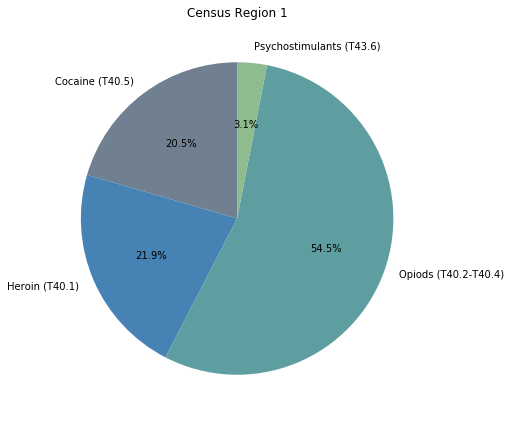

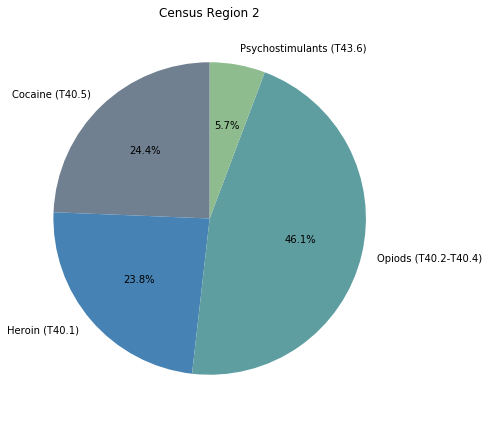

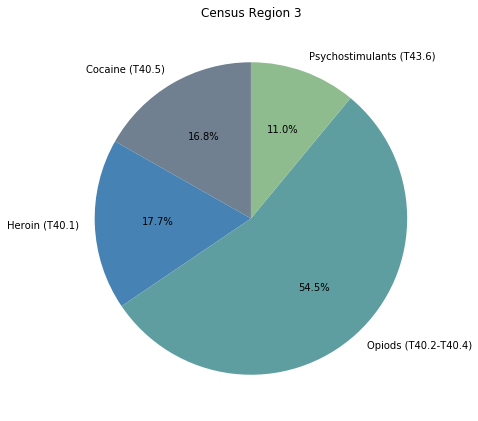

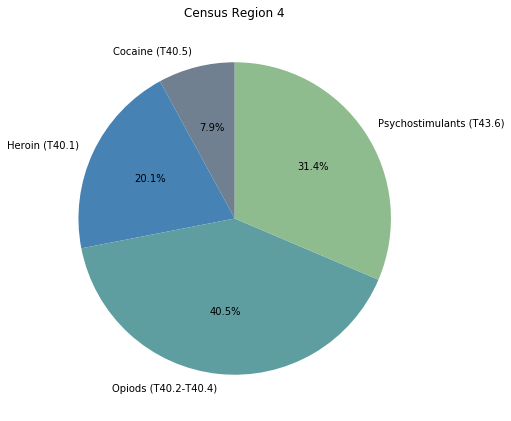

In [17]:
named_drugs_reg = reg_pivot.drop(["Number of Deaths", "Number of Drug Overdose Deaths"])
named_drugs_reg = named_drugs_reg.rename({"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)":"Opiods (T40.2-T40.4)","Psychostimulants with abuse potential (T43.6)": "Psychostimulants (T43.6)"})

# Data to plot
labels = named_drugs_reg.index
named_deaths_ax1_sizes = named_drugs_reg["A"]
named_deaths_ax2_sizes = named_drugs_reg["B"]
named_deaths_ax3_sizes = named_drugs_reg["C"]
named_deaths_ax4_sizes = named_drugs_reg["D"]
colors = ["slategray", "steelblue", "cadetblue", "darkseagreen"]

# Plot Census Region 1
fig1, named_deaths_ax1 = plt.subplots(figsize=(7, 8))
named_deaths_ax1.pie(named_deaths_ax1_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax1.set(aspect="equal", title="Census Region 1")

plt.show()

#Plot Census Region 2
fig2, named_deaths_ax2 = plt.subplots(figsize=(7, 8))
named_deaths_ax2.pie(named_deaths_ax2_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax2.set(aspect="equal", title="Census Region 2")

plt.show()

#Plot Census Region 3
fig3, named_deaths_ax3 = plt.subplots(figsize=(7, 8))
named_deaths_ax3.pie(named_deaths_ax3_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax3.set(aspect="equal", title="Census Region 3")

plt.show()

#Plot Census Region 3
fig4, named_deaths_ax4 = plt.subplots(figsize=(7, 8))
named_deaths_ax4.pie(named_deaths_ax4_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax4.set(aspect="equal", title="Census Region 4")

plt.show()

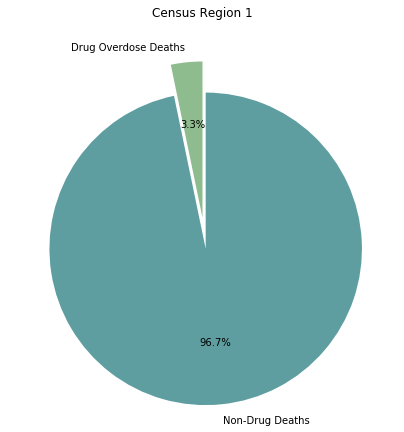

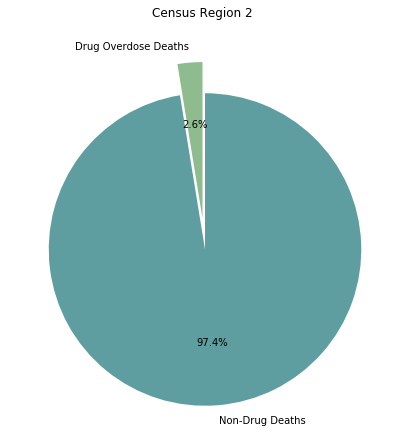

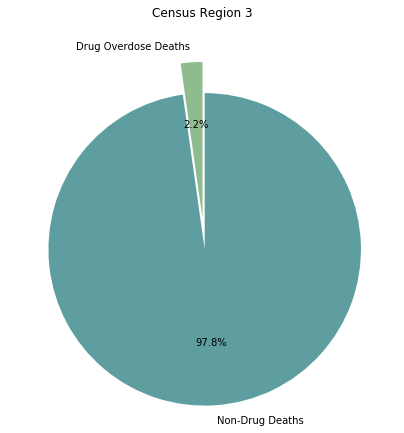

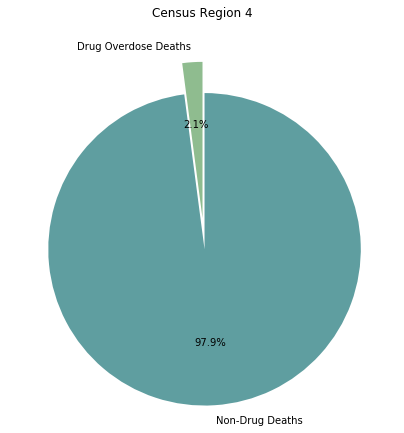

In [15]:
total_death_reg = reg_pivot.drop(["Cocaine (T40.5)", "Heroin (T40.1)",
                                  "Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",
                                  "Psychostimulants with abuse potential (T43.6)"])
total_death_reg = total_death_reg.append(pd.Series(name="Non-Drug Deaths"))
total_death_reg.loc["Non-Drug Deaths"] = total_death_reg.loc["Number of Deaths"] - total_death_reg.loc["Number of Drug Overdose Deaths"]
total_death_reg = total_death_reg.rename({"Number of Drug Overdose Deaths": "Drug Overdose Deaths"})
total_death_reg = total_death_reg.drop("Number of Deaths")

# Data to plot
labels = total_death_reg.index
death_ax1_sizes = total_death_reg["A"]
death_ax2_sizes = total_death_reg["B"]
death_ax3_sizes = total_death_reg["C"]
death_ax4_sizes = total_death_reg["D"]
colors = ["darkseagreen","cadetblue"]

# Plot Census Region 1
fig1, death_ax1 = plt.subplots(figsize=(7, 8))
death_ax1.pie(death_ax1_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax1.set(aspect="equal", title="Census Region 1")

plt.show()

#Plot Census Region 2
fig2, death_ax2 = plt.subplots(figsize=(7, 8))
death_ax2.pie(death_ax2_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax2.set(aspect="equal", title="Census Region 2")

plt.show()

#Plot Census Region 3
fig3, death_ax3 = plt.subplots(figsize=(7, 8))
death_ax3.pie(death_ax3_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax3.set(aspect="equal", title="Census Region 3")

plt.show()

#Plot Census Region 3
fig4, death_ax4 = plt.subplots(figsize=(7, 8))
death_ax4.pie(death_ax4_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax4.set(aspect="equal", title="Census Region 4")

plt.show()

